In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [110]:
# используем выборку, связанную с коронавирусом
data = pd.read_csv('COVID19_line_list_data.csv', sep=",")

In [111]:
data.shape

(1085, 27)

In [112]:
data.dtypes

id                         int64
case_in_country          float64
reporting date            object
Unnamed: 3               float64
summary                   object
location                  object
country                   object
gender                    object
age                      float64
symptom_onset             object
If_onset_approximated    float64
hosp_visit_date           object
exposure_start            object
exposure_end              object
visiting Wuhan             int64
from Wuhan               float64
death                     object
recovered                 object
symptom                   object
source                    object
link                      object
Unnamed: 21              float64
Unnamed: 22              float64
Unnamed: 23              float64
Unnamed: 24              float64
Unnamed: 25              float64
Unnamed: 26              float64
dtype: object

In [113]:
# проверим есть ли пропущенные значения
data.isnull().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 25              1085
Unnamed: 26              1085
dtype: int64

In [114]:
#удалим полностью пустые колонки
dat = data.dropna(axis=1, how='all')
dat.shape

(1085, 20)

In [115]:
dat.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [116]:
# Удаление колонок, содержащих пустые значения
data_new_1 = dat.dropna(axis=1, how='any')
(dat.shape, data_new_1.shape)

((1085, 20), (1085, 8))

In [117]:
# Удаление строк, содержащих пустые значения
data_new_2 = dat.dropna(axis=0, how='any')
(dat.shape, data_new_2.shape)

((1085, 20), (20, 20))

Заполнить все пропуски нулями не получится, потому что присутствуют категорийные столбцы

In [118]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
total_count = dat.shape[0]
for col in dat.columns:
    # Количество пустых значений 
    temp_null_count = dat[dat[col].isnull()].shape[0]
    dt = str(dat[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка case_in_country. Тип данных float64. Количество пустых значений 197, 18.16%.
Колонка age. Тип данных float64. Количество пустых значений 242, 22.3%.
Колонка If_onset_approximated. Тип данных float64. Количество пустых значений 525, 48.39%.
Колонка from Wuhan. Тип данных float64. Количество пустых значений 4, 0.37%.


In [119]:
# Фильтр по колонкам с пропущенными значениями
data_num = dat[num_cols]
data_num

,case_in_country,age,If_onset_approximated,from Wuhan
0,NaN,66.0,0.0,0.0
1,NaN,56.0,0.0,1.0
2,NaN,46.0,0.0,1.0
3,NaN,60.0,NaN,0.0
4,NaN,58.0,NaN,0.0
...,...,...,...,...
1080,2.0,24.0,NaN,0.0
1081,1.0,35.0,NaN,0.0
1082,1.0,NaN,NaN,0.0
1083,1.0,NaN,NaN,0.0


In [136]:
dat['If_onset_approximated'].unique()

array([ 0., nan,  1.])

C:\Users\Dasik\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Dasik\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


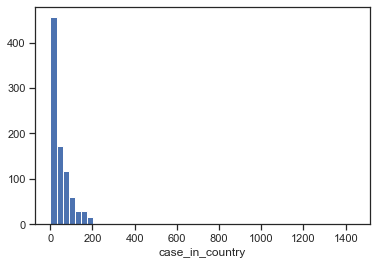

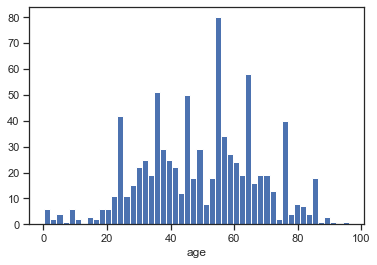

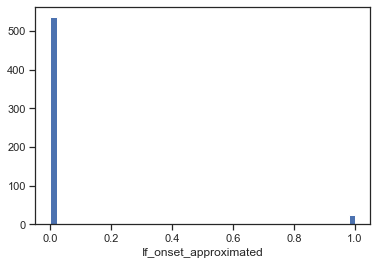

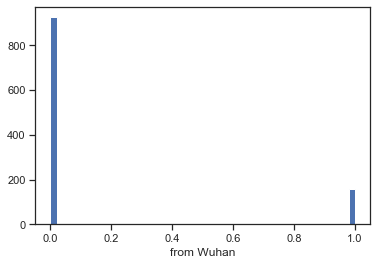

In [120]:

# Гистограмма по признакам
for col in data_num:
    plt.hist(dat[col], 50)
    plt.xlabel(col)
    plt.show()

In [121]:
# Фильтр по пустым значениям поля MasVnrArea 
dat[dat['age'].isnull()]

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
22,23,NaN,1/22/2020,First confirmed imported COVID-19 pneumonia pa...,Shanxi,China,male,NaN,1/19/2020,0.0,1/20/2020,01/12/20,1/15/2020,1,0.0,0,0,NaN,央视新闻,https://www.weibo.com/2656274875/IqGCB0OTO?fro...
91,92,NaN,1/24/2020,new recovered imported COVID-19 pneumonia pati...,Beijing,China,female,NaN,NaN,NaN,NaN,NaN,01/08/20,1,0.0,0,0,NaN,人民日报,https://m.weibo.cn/status/4464259805726673?
116,117,NaN,1/25/2020,new recovered imported COVID-19 pneumonia pati...,Beijing,China,male,NaN,NaN,NaN,NaN,NaN,01/08/20,1,0.0,0,0,NaN,央视新闻,https://m.weibo.cn/status/4464576223073059?
145,146,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,NaN,1/16/2020,0.0,1/20/2020,01/08/20,1/16/2020,1,0.0,0,0,NaN,央视新闻,https://m.weibo.cn/status/4464865911441959?
146,147,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,NaN,1/14/2020,0.0,1/20/2020,01/10/20,01/11/20,1,0.0,0,0,NaN,央视新闻,https://m.weibo.cn/status/4464865911441959?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1077,15.0,2/25/2020,new COVID-19 patient confirmed in Bahrain: mal...,Bahrain,Bahrain,male,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Gulf News,https://gulfnews.com/world/gulf/bahrain/bahrai...
1077,1078,16.0,2/25/2020,new COVID-19 patient confirmed in Bahrain: fem...,Bahrain,Bahrain,female,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Gulf News,https://gulfnews.com/world/gulf/bahrain/bahrai...
1078,1079,17.0,2/25/2020,new COVID-19 patient confirmed in Bahrain: fem...,Bahrain,Bahrain,female,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Gulf News,https://gulfnews.com/world/gulf/bahrain/bahrai...
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...


In [122]:
# Запоминаем индексы строк с пустыми значениями
flt_index = dat[dat['age'].isnull()].index
flt_index

Int64Index([  22,   91,  116,  145,  146,  147,  177,  201,  202,  204,
            ...
            1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1082, 1083],
           dtype='int64', length=242)

In [123]:
data_age = data_num[['age']]
data_age.head()

,age
0,66.0
1,56.0
2,46.0
3,60.0
4,58.0


In [124]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [125]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_age)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [126]:
strategies=['mean', 'median','most_frequent']

In [127]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_age)
    return data_num_imp[mask_missing_values_only]

In [128]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368921, 49.48368921, 49.48368921,
        49.48368921, 49.48368921, 49.48368

In [129]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51., 51., 51., 51., 51., 51., 51

In [130]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        55., 55., 55., 55., 55., 

Заменим все пустые данные столбца 'age' на данные  test_num_impute(strategies[0])

In [131]:
new_age = pd.DataFrame({'id': flt_index,
                       'age':test_num_impute(strategies[0])})
new_age

,id,age
0,22,49.483689
1,91,49.483689
2,116,49.483689
3,145,49.483689
4,146,49.483689
...,...,...
237,1076,49.483689
238,1077,49.483689
239,1078,49.483689
240,1082,49.483689


In [133]:
for index, row in new_age.iterrows():
    dat.loc[row['id'], 'age'] = row['age']
dat

C:\Users\Dasik\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.000000,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.000000,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.000000,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.000000,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.000000,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,49.483689,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,49.483689,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [135]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in dat.columns:
    # Количество пустых значений 
    temp_null_count = dat[dat[col].isnull()].shape[0]
    dt = str(dat[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка reporting date. Тип данных object. Количество пустых значений 1, 0.09%.
Колонка summary. Тип данных object. Количество пустых значений 5, 0.46%.
Колонка gender. Тип данных object. Количество пустых значений 183, 16.87%.
Колонка symptom_onset. Тип данных object. Количество пустых значений 522, 48.11%.
Колонка hosp_visit_date. Тип данных object. Количество пустых значений 578, 53.27%.
Колонка exposure_start. Тип данных object. Количество пустых значений 957, 88.2%.
Колонка exposure_end. Тип данных object. Количество пустых значений 744, 68.57%.
Колонка symptom. Тип данных object. Количество пустых значений 815, 75.12%.


In [139]:
cat_temp_data['gender'].unique()

array(['male', 'female', nan], dtype=object)

In [140]:
cat_temp_data[cat_temp_data['gender'].isnull()].shape

(183, 1)

In [141]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['male'],
       ['female'],
       ['male'],
       ...,
       ['male'],
       ['male'],
       ['male']], dtype=object)

In [142]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['female', 'male'], dtype=object)

In [143]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,male
1,female
2,male
3,female
4,male
...,...
1080,male
1081,male
1082,male
1083,male


In [160]:
for index, row in cat_enc.iterrows():
    dat.loc[index, 'gender'] = row['c1']
dat

C:\Users\Dasik\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.000000,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.000000,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.000000,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.000000,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.000000,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,male,24.000000,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,male,35.000000,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,49.483689,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,49.483689,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [147]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [149]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc_le

array([1, 0, 1, ..., 1, 1, 1])

In [166]:
gen_enc = pd.DataFrame({'gen':cat_enc_le})
for index, row in gen_enc.iterrows():
    dat.loc[index, 'gender'] = row['gen']
dat

C:\Users\Dasik\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,1,66.000000,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,0,56.000000,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,1,46.000000,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,0,60.000000,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,1,58.000000,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,1,24.000000,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,1,35.000000,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,1,49.483689,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,1,49.483689,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [167]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [168]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(dat[['age']])

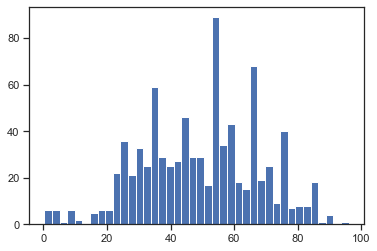

In [174]:
plt.hist(dat['age'], 40)
plt.show()

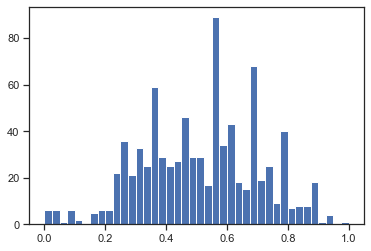

In [175]:
plt.hist(sc1_data, 40)
plt.show()

In [177]:
sc2 = Normalizer()
sc2_data = sc2.fit_transform(dat[['age']])

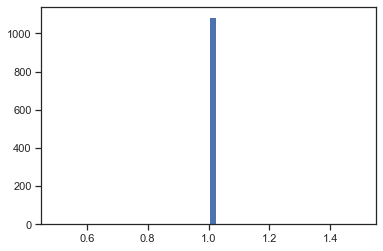

In [178]:
plt.hist(sc2_data, 40)
plt.show()